In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.loc[customers['Annual Income (k$)']>125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_annual= scaler.fit_transform(customers['Annual Income (k$)'].values.reshape(-1,1))

In [6]:
scaled_annual.shape

(200, 1)

In [7]:
customers['Scaled_Annual_income']= scaled_annual

In [9]:
customers['Scaled_Annual_income'].describe()

count    2.000000e+02
mean    -2.131628e-16
std      1.002509e+00
min     -1.738999e+00
25%     -7.275093e-01
50%      3.587926e-02
75%      6.656748e-01
max      2.917671e+00
Name: Scaled_Annual_income, dtype: float64

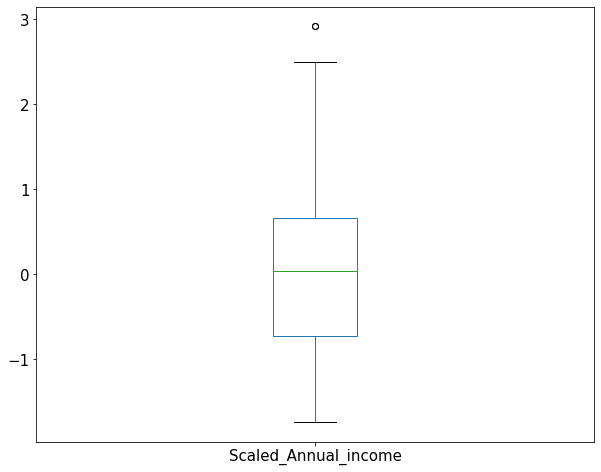

In [11]:
customers.boxplot(figsize=(10,8),grid=False,fontsize=15,column=['Scaled_Annual_income']);

In [17]:
outliers= np.where(customers['Scaled_Annual_income']>2.5)
outliers

(array([198, 199], dtype=int64),)

In [14]:
customers.iloc[outliers]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_income


In [18]:
 customers.iloc[outliers]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Scaled_Annual_income
198,199,Male,32,137,18,2.917671
199,200,Male,30,137,83,2.917671


In [19]:
customers_outliers_removed = customers.drop(customers.index[outliers])

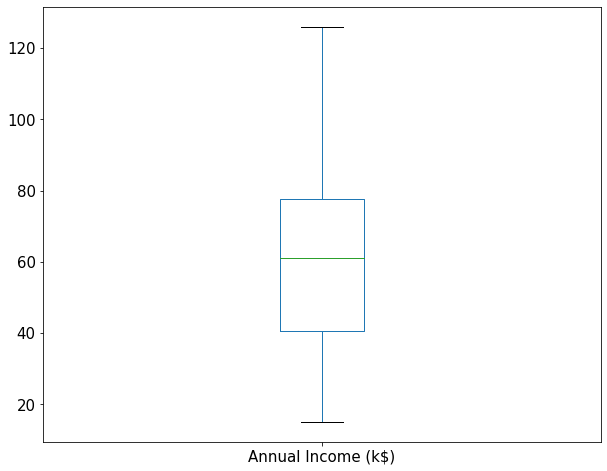

In [21]:
customers_outliers_removed.boxplot(figsize=(10,8),grid=False,fontsize=15,column=['Annual Income (k$)']);